# Modern Convolutional Neural Networks

Now that we know the basics, explore more advanced models. Each of the models explored was at some point the "state of the art" and will be explored in chronological order. 

Begin With AlexNet, the first large-scale network to beat out conventional computer vision methods. The VGG netowkr which makes use of a number of repeated blocks of elements. The Network in netork NiN, which convolves whole neural networks patch-wise over inputs. GoogLeNet which uses networks with multi-branch convolutions and ResNet, which remains one of the most popular off-the-shelf architectures. 

Over time, many optimisations for efficient networks uncovered, which lead to ShiftNet (from coordinate shifts) and eventually lead to the automatic search for efficient architectures. 

# AlexNet

Although LeNet was accurate for small image sets, its performance was not immediately proven on larger image datasets. Neural networks were often surpassed by kernel methods and the like. Although, for computer visison, the raw image data was almost never fed directly into the model, instead, highly refined features were extracted from the images, which were _then_ fed into the learning algorithms (which had much simpler structures). Computational hardware was also not yet ready to support the training of neural networks with large numbers of parameters. Many of the tricks to enable the training of neural networks had not yet been invented.

So rather than direct "pixed to classification" systems, classical pipelines looked more like: 1
1. Obtain dataset (expensive, tricky, for digital imagery in early days)
2. Preprocess data with hand crafted features for dataset.
3. Feed all this data though a feature extractor.
4. Dump into linear model or kernel method to train.

In short, features, geometry and preprocessing mattered far more than learning algorithm, unlike much of the rest of the machine learning field at the time.

## Representational Learning

Until now, feature extraction and engineering (by hand) was considered the most important step of the model. However, Yann LeCun, Geoff Hinton, Andrew Ng, etc, believed the features should be _learned_. The first modern CNN (published in 2012), _Alex Net_ (named after Alex krizhevsky) was an evolutionary improvement over LeNet. 

Interestingly, in the lowest layers of filters (closest to the input?) the CNN learned filters that looked comparable to many traditional filters. Subsequent layers may combine these features to represent ever more complex compoents of imagery. 

LeNet was published in 1995, while AlexNet, its descendent, was published in 2012, despite the fact that they are structurally highly similar. This significant delay was largely due to the need for computational hardware and datasets to catch up. 

### Data

Deep models require _significant_ amounts of data in order to reach the regime where they meaningfully outperform traditional methods based on convex optimisations (e.g. kernel methods). However, in the 90's most research relied on tiny datasets. 

In 2009, the ImageNet dataset was released. It used Google Image search to find initial candidate examples for images, then the Amazon Mechanical Turk crowdsourcing pipeline to actually confirm that each image fitted with its category. There were 1000 categories in total, chosen from the popular WordNet "noun nodes" dataset of 1995. This meant the ImageNet dataset had 1 million images, which was orders of magnitude larger than the existing datasets of the time (e.g. CIFAR which had 60,000). They were also at comparably high resolution (244 x 244). 

### Hardware

Deep learning models are _fantastically_ thirsty when it comes to compute cycles. GPUs were absolutely mandatory for pushing the field forwards. GPG-GPU is general purpose gpus. 

GPUS have a vast number of much weaker cores than CPUs. CPUs have all sorts of additional components, such as cache, control flow, speculative execution, etc, for running general purpose code extremely efficiently. GPUs are much simpler, so they take up less space on the die, meaning that you can have thousands of cores, instead of just, say, 4. 

A major advance was that Alex Krizhevsky and Ilya Sutskever implemented their CNN on GPUs. In fact, the cuda-convnet code they wrote was so good that it was the industry standard for sveral years. 

## AlexNet

AlexNet, employing an 8-layer CNN, won the ImageNet challenge in 2012 by a large margin. This was really the first time that it was demonstrated that learned features could totally dominate those which were constructed by hand. 

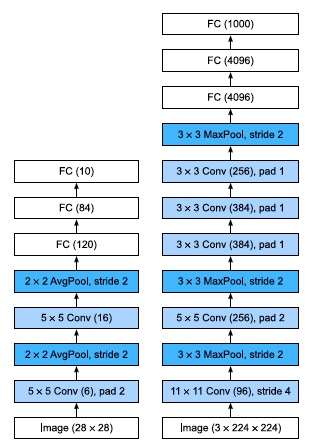

^ LeNet, 1995, left compared to AlexNet, 2012, right. 

The overall archiecture is quite similar, but AlexNet is significantly deeper. With 8 convolutional layers instead of 4. The convolutional windows are also much larger.  One major difference is that it uses ReLU instead of sigmoid activation functions. 

### Architecture

The first convolution window is 11x11, which is required since the images in ImageNet are substantially larger than those the MNIST data that LeNet was trained on. The subsequent layers reduce the size of this convolution window to 5x5 and 3x3. After each convolution, there is a max-pooling layer with a 3x3 window and a stride of 2. There are 10 times more channels than LeNet. 

After the final convolutional layer, there are two enormous fully connected layers with 4096 outputs each, requiring almost 1GB of model parameters. 

### Activation Functions

Sigmoid replaced with ReLU, no vanishing gradients.

### Capacity Control and Preprocessing

Model complexity controlled by dropout, while LeNet only uses weight decay. The training loop also included a great deal of image flipping, clipping, colour changes, etc, all of which make the model more robust. 

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        
        self.save_hyperparameters()
        
        self.net = nn.Sequential(
            # First convolutional section
            nn.LazyConv2d(out_channels=96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),

            # Second convolutional layer
            nn.LazyConv2d(out_channels=256, kernel_size=5, padding=2),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),

            #3rd, 4th, 5th convolutional layers
            nn.LazyConv2d(out_channels=384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(out_channels=384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(out_channels=256, kernel_size=3, padding=1), nn.ReLU(),

            # Final pooling and flatten
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),

            # Fully connected layers with dropout
            nn.LazyLinear(out_features=4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(out_features=4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(out_features=num_classes), nn.ReLU(),
        )
        
        self.net.apply(d2l.init_cnn)

In [11]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## Training

We'll train on FashionMNIST here, as the actual training could take hours, or even days to complete. To be faithful to the original archicture, we'll actually _upscale_ the images. heh.

In [15]:
if torch.cuda.is_available():
    model = AlexNet(lr=0.01)
    data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
    trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
    trainer.fit(model, data)
else:
    print("You're not training this without a GPU. If you really wanna, you can remove this check")

You're not training this without a GPU. If you really wanna, you can remove this check


## Discussion

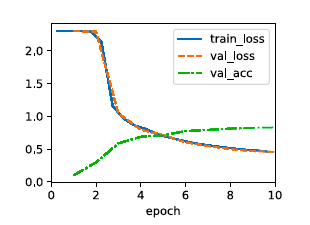

^ here's one we trained earlier

There are a number of critical improvements in AlexNet over LeNet. Both for accuracy (dropout) and ease of training (ReLU). What's equally exciting is the amount of prorgess made in deep learning tooling. Implementing this model was trivially easy, only requiring a handful of lines of code

There is an achilles heel when it comes to efficiency, the last two hidden layers require significant memory and computation to execute. This is a major reason it's been surpassed by more effective architectures. 